In [3]:
import numpy as np
from ase.io import read
from ase.eos import calculate_eos
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt
from ase.eos import EquationOfState as eos
from ase.units import Bohr,Rydberg
from ase.io.trajectory import TrajectoryReader as trread

# NaGaO2

In [40]:
def murnaghan(V, E0, B0, BP, V0):
    'From PRB 28,5480 (1983)'

    E = E0 + B0 * V / BP * (((V0 / V)**BP) / (BP - 1) + 1) - V0 * B0 / (BP - 1)
    return E

def r(x,d=False):
    # loading the storied fit to murnaghan plot
    traj = Trajectory('nagao2-r3m-gga.traj')
    v=[i.get_volume() for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg for i in traj])
    # fitting again a polynomial of degree 3
    # this is done so because deriv of poly is effeciently implelmented in numpy
    z = np.polyfit(v,e1, 3)
    p = np.poly1d(z)
    if d:
        # derivative of the poly
        return p.deriv()(x)
    else:
        return p(x)
def p(x,d=False):
    traj = Trajectory('nagao2-p2n1_gga.traj')
    v=[i.get_volume()*0.25 for i in traj]
    e1=np.array([i.get_total_energy() * Rydberg*0.25 for i in traj])
    z = np.polyfit(v,e1, 3)
    p1 = np.poly1d(z)
    if d:
        return p1.deriv()(x)
    else:
        return p1(x)
def equations(X):
    x1,x2=X
    e1=r(x1,d=1)-p(x2,d=1)
    e2=(r(x1)-p(x2))/(x1-x2) - r(x1,d=1)
    return (e1,e2)
def line(x,results=None,dir=0):
    x1,x2=result.x
    z=np.polyfit([x1,x2], [r(x1),p(x2)], 1)
    p1 = np.poly1d(z)
    return p1(x)
        
def get_ab(results):
    x1,x2=result.x
    return np.polyfit([x1,x2], [r(x1),p(x2)], 1)


In [41]:
from scipy.optimize import least_squares
lb = (40, 49)   # lower bounds on x1, x2
ub = (50, 59)   # upper bounds
result = least_squares(equations, [42, 55], ftol=1e-12, xtol=1e-12, gtol=1e-12, bounds=(lb, ub))


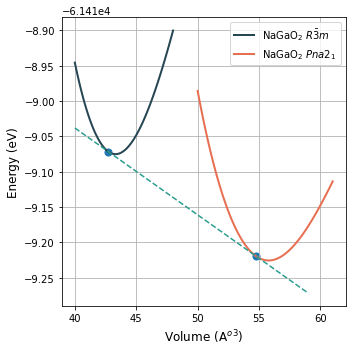

In [42]:
fig,ax=plt.subplots(figsize=(5,5))
V=np.linspace(40,48,100)
ax.plot(V,r(V),c="#264653",lw=2,label="NaGaO$_2$ $R\\bar{3}m$")

V=np.linspace(50,61,100)
ax.plot(V,p(V),c="#e76f51",lw=2,label="NaGaO$_2$ $Pna2_1$")

x=np.linspace(40,59)
ax.plot(x,line(x,result),c="#2a9d8f",ls="--")
ax.scatter(result.x,[r(result.x[0]),p(result.x[1])],s=50)
get_ab(result)

ax.set_xlabel("Volume (A$^o$$^3$)",fontsize=12)
ax.set_ylabel("Energy (eV)",fontsize=12)
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig("E-P-Nagao2.png",dpi=300)
plt.show()

In [36]:
get_ab(result)

array([-1.22964937e-02, -6.14185462e+04])

# LiGaO2

In [43]:


def r(x,d=False):
    v=np.array([248.461345,213.024546,226.763961,304.375832,287.625065])*(Bohr**3)
    e=np.array([-1.640793,-1.6035325,-1.6281965,-1.5933089,-1.6149305])*Rydberg
    z = np.polyfit(v,e, 3)
    p1 = np.poly1d(z)
    if d:
        return p1.deriv()(x)
    else:
        return p1(x)

def p(x,d=False):
    v=np.array([1213.414562,1404.679032,1486.485015,1107.450708,1040.351310])*(Bohr**3) *0.25
    e=np.array([-6.5772386,-6.4652743,-6.3775016,-6.5374761,-6.4480003])*Rydberg*0.25
    z = np.polyfit(v,e, 3)
    p1 = np.poly1d(z)
    if d:
        return p1.deriv()(x)
    else:
        return p1(x)

def equations(X):
    x1,x2=X
    e1=r(x1,d=1)-p(x2,d=1)
    e2=(r(x1)-p(x2))/(x1-x2) - r(x1,d=1)
    return (e1,e2)
def line(x,results=None,dir=0):
    x1,x2=result.x
    z=np.polyfit([x1,x2], [r(x1),p(x2)], 1)
    p1 = np.poly1d(z)
    return p1(x)
        
def get_ab(results):
    x1,x2=result.x
    return np.polyfit([x1,x2], [r(x1),p(x2)], 1)
from scipy.optimize import least_squares
lb = (32, 32)   # lower bounds on x1, x2
ub = (50,50)   # upper bounds
result = least_squares(equations, [35, 42], ftol=1e-12, xtol=1e-12, gtol=1e-12, bounds=(lb, ub))

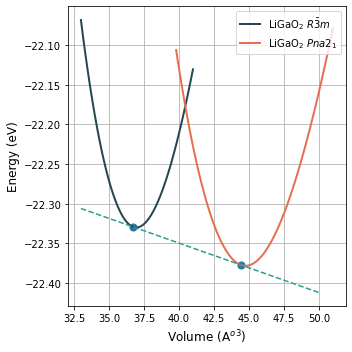

In [45]:
fig,ax=plt.subplots(figsize=(5,5))
V=np.linspace(33,41,100)
ax.plot(V,r(V),c="#264653",lw=2,label="LiGaO$_2$ $R\\bar{3}m$")

V=np.linspace(39.8,51,100)
ax.plot(V,p(V),c="#e76f51",lw=2,label="LiGaO$_2$ $Pna2_1$")

x=np.linspace(33,50)
ax.plot(x,line(x,result),c="#2a9d8f",ls="--")
ax.scatter(result.x,[r(result.x[0]),p(result.x[1])],s=50)


ax.set_xlabel("Volume (A$^o$$^3$)",fontsize=12)
ax.set_ylabel("Energy (eV)",fontsize=12)
ax.legend(loc="upper right")
ax.grid()
plt.tight_layout()
plt.savefig("E-P-Ligao2.png",dpi=300)
plt.show()

In [31]:
get_ab(result)

array([-6.24004947e-03, -2.21000855e+01])